## **Machine Learning Models**

For this binary classification problem, we would like to use 3 models that best predicts the outcome of job placement.

> 1. `DecisionTree Classifier`
> 2. `Logistic Regression` 
> 3. `Support Vector-Machine`

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Import essential libraries
import numpy as np
import pandas as pd
import seaborn as sb
%matplotlib inline
import matplotlib.pyplot as plt
sb.set()

df_clean_ohe= pd.read_csv('/content/Job_Placement_Clean.csv')
df_clean_ohe

Mounted at /content/drive


,Unnamed: 0,SSC_PERCENTAGE,HSC_PERCENTAGE,DEGREE_PERCENTAGE,EMP_TEST_PERCENTAGE,MBA_PERCENTAGE,GENDER_F,GENDER_M,SSC_BOARD_Central,SSC_BOARD_Others,...,HSC_SUBJECT_Commerce,HSC_SUBJECT_Science,UNDERGRAD_DEGREE_Comm&Mgmt,UNDERGRAD_DEGREE_Others,UNDERGRAD_DEGREE_Sci&Tech,SPECIALISATION_Mkt&Fin,SPECIALISATION_Mkt&HR,WORK_EXPERIENCE_No,WORK_EXPERIENCE_Yes,Placed
0,0,67.00,91.00,58.00,55.0,58.80,0,1,0,1,...,1,0,0,0,1,0,1,1,0,1
1,1,79.33,78.33,77.48,86.5,66.28,0,1,1,0,...,0,1,0,0,1,1,0,0,1,1
2,2,65.00,68.00,64.00,75.0,57.80,0,1,1,0,...,0,0,1,0,0,1,0,1,0,1
3,3,56.00,52.00,52.00,66.0,59.43,0,1,1,0,...,0,1,0,0,1,0,1,1,0,0
4,4,85.80,73.60,73.30,96.8,55.50,0,1,1,0,...,1,0,1,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,210,80.60,82.00,77.60,91.0,74.49,0,1,0,1,...,1,0,1,0,0,1,0,1,0,1
211,211,58.00,60.00,72.00,74.0,53.62,0,1,0,1,...,0,1,0,0,1,1,0,1,0,1
212,212,67.00,67.00,73.00,59.0,69.72,0,1,0,1,...,1,0,1,0,0,1,0,0,1,1
213,213,74.00,66.00,58.00,70.0,60.23,1,0,0,1,...,1,0,1,0,0,0,1,1,0,1


In [ ]:
df_clean_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  215 non-null    int64  
 1   SSC_PERCENTAGE              215 non-null    float64
 2   HSC_PERCENTAGE              215 non-null    float64
 3   DEGREE_PERCENTAGE           215 non-null    float64
 4   EMP_TEST_PERCENTAGE         215 non-null    float64
 5   MBA_PERCENTAGE              215 non-null    float64
 6   GENDER_F                    215 non-null    int64  
 7   GENDER_M                    215 non-null    int64  
 8   SSC_BOARD_Central           215 non-null    int64  
 9   SSC_BOARD_Others            215 non-null    int64  
 10  HSC_BOARD_Central           215 non-null    int64  
 11  HSC_BOARD_Others            215 non-null    int64  
 12  HSC_SUBJECT_Arts            215 non-null    int64  
 13  HSC_SUBJECT_Commerce        215 non

## **Train-test split**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df_clean_ohe1 = df_clean_ohe.copy()
df_clean_ohe1

,Unnamed: 0,SSC_PERCENTAGE,HSC_PERCENTAGE,DEGREE_PERCENTAGE,EMP_TEST_PERCENTAGE,MBA_PERCENTAGE,GENDER_F,GENDER_M,SSC_BOARD_Central,SSC_BOARD_Others,...,HSC_SUBJECT_Commerce,HSC_SUBJECT_Science,UNDERGRAD_DEGREE_Comm&Mgmt,UNDERGRAD_DEGREE_Others,UNDERGRAD_DEGREE_Sci&Tech,SPECIALISATION_Mkt&Fin,SPECIALISATION_Mkt&HR,WORK_EXPERIENCE_No,WORK_EXPERIENCE_Yes,Placed
0,0,67.00,91.00,58.00,55.0,58.80,0,1,0,1,...,1,0,0,0,1,0,1,1,0,1
1,1,79.33,78.33,77.48,86.5,66.28,0,1,1,0,...,0,1,0,0,1,1,0,0,1,1
2,2,65.00,68.00,64.00,75.0,57.80,0,1,1,0,...,0,0,1,0,0,1,0,1,0,1
3,3,56.00,52.00,52.00,66.0,59.43,0,1,1,0,...,0,1,0,0,1,0,1,1,0,0
4,4,85.80,73.60,73.30,96.8,55.50,0,1,1,0,...,1,0,1,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,210,80.60,82.00,77.60,91.0,74.49,0,1,0,1,...,1,0,1,0,0,1,0,1,0,1
211,211,58.00,60.00,72.00,74.0,53.62,0,1,0,1,...,0,1,0,0,1,1,0,1,0,1
212,212,67.00,67.00,73.00,59.0,69.72,0,1,0,1,...,1,0,1,0,0,1,0,0,1,1
213,213,74.00,66.00,58.00,70.0,60.23,1,0,0,1,...,1,0,1,0,0,0,1,1,0,1


In [ ]:
X= df_clean_ohe1.drop(columns=['Placed'], axis=1)
y= df_clean_ohe1['Placed']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

Feature scaling will be used to prevent the model from getting biased toward a specific range of values. 

In [ ]:
# feature scaling using StandardScaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(172, 21)
(43, 21)
(172,)
(43,)


## **Feature selection using `RFE`**
`RFE (Recursive Feature Elimination)` is another feature selection technique that recursively removes features and builds a model on the remaining features until the optimal number of features is reached.

In [ ]:
from sklearn.feature_selection import RFE

def rfe_selection(clf, X_train, y_train):

    # Create RFE object and select best 5 features
    rfe = RFE(estimator=clf, n_features_to_select=5)

    # fit the model on train data
    rfe.fit(X_train, y_train)

    # print out the selected features (code snippet referenced from given link)
    print(rfe.support_)
    print(rfe.ranking_)

    # convert NumPy array to Pandas DataFrame
    X_train_df = pd.DataFrame(X_train, columns=X.columns)

    # print out the selected features
    print("\n Selected features are: ", X_train_df.columns[rfe.support_])


### **Finding the best features for Decision Tree Classifier**

In [ ]:
# import libraries for decision tree
from sklearn.tree import DecisionTreeClassifier

**Finding the best depth of tree**


1.   Iterate over different values of maximum depth
2.   Check the model's performance on both the training and testing datasets using its accuracy score



In [ ]:
# finding best tree depth to do the model

list = []

models = []

for i in range(1, 15):
    dectree = DecisionTreeClassifier(max_depth = i)  # create the decision tree object
    dectree.fit(X_train, y_train)         
    y_train_pred = dectree.predict(X_train)
    y_test_pred = dectree.predict(X_test)

    # Check the Goodness of Fit (on Test Data)
    list.append(dectree.score(X_test, y_test))
    models.append(dectree)

**Results for best depth**

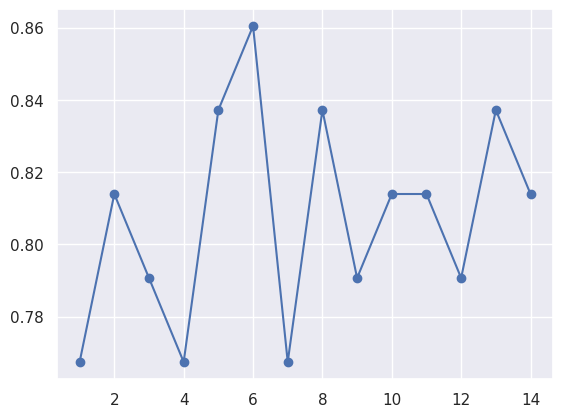

In [ ]:
# Visualising accuracies of decision trees of different depths
plt.plot(range(1,15), list, marker='o')

In [ ]:
# Best depth
print(f"Best accuracy: {max(list)}\nDepth: {list.index(max(list))+1}")

Best accuracy: 0.8604651162790697
Depth: 6


In [ ]:
# Print 5 features using RFE for Decision Tree model
dectree = DecisionTreeClassifier(max_depth=6)
print('Decision Tree Features\n')
rfe_selection(dectree, X_train, y_train)

Decision Tree Features

[ True  True  True False  True False False False False False False False
 False  True False False False False False False False]
[ 1  1  1 11  1 12 10  8 14 16 15 13  9  1  7  6  5  4  3  2 17]

 Selected features are:  Index(['SSC_PERCENTAGE', 'HSC_PERCENTAGE', 'DEGREE_PERCENTAGE',
       'MBA_PERCENTAGE', 'HSC_SUBJECT_Science'],
      dtype='object')


### **Finding the best features for Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

# create logistic regression model
logreg = LogisticRegression(random_state=0, penalty='l1', solver='liblinear',max_iter=1000)

In [ ]:
# Print 5 features using RFE for LogReg Model
print('Logistic Regression Features\n')
rfe_selection(logreg, X_train, y_train)

Logistic Regression Features

[ True  True  True False  True False False False False False False False
 False False False False False False False  True False]
[ 1  1  1 10  1  9  5 11 14  8  2  6  7 12  3 13 15 16 17  1  4]

 Selected features are:  Index(['SSC_PERCENTAGE', 'HSC_PERCENTAGE', 'DEGREE_PERCENTAGE',
       'MBA_PERCENTAGE', 'WORK_EXPERIENCE_No'],
      dtype='object')


### **Finding the best features for SVM**

In [ ]:
from sklearn.svm import SVC

# create SVM model
svc = SVC(kernel='linear',C=1.0)

In [ ]:
# Print 5 features using RFE for Support Vector Machine
print('Support Vector Machine Features\n')
rfe_selection(svc, X_train, y_train)

Support Vector Machine Features

[ True False  True False  True False False False False False False False
 False False False False False False False  True  True]
[ 1  5  1  3  1  8  2 11  7 16 13 15  6 14  4 17  9 10 12  1  1]

 Selected features are:  Index(['SSC_PERCENTAGE', 'DEGREE_PERCENTAGE', 'MBA_PERCENTAGE',
       'WORK_EXPERIENCE_No', 'WORK_EXPERIENCE_Yes'],
      dtype='object')


# **`Decision Tree`**

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.

[Text(0.4027777777777778, 0.9285714285714286, 'SSC_PERCENTAGE <= -1.02\ngini = 0.435\nsamples = 172\nvalue = [55, 117]\nclass = Placed'),
 Text(0.18518518518518517, 0.7857142857142857, 'DEGREE_PERCENTAGE <= 0.576\ngini = 0.185\nsamples = 29\nvalue = [26, 3]\nclass = Not placed'),
 Text(0.14814814814814814, 0.6428571428571429, 'MBA_PERCENTAGE <= -1.538\ngini = 0.133\nsamples = 28\nvalue = [26, 2]\nclass = Not placed'),
 Text(0.07407407407407407, 0.5, 'DEGREE_PERCENTAGE <= -0.534\ngini = 0.444\nsamples = 3\nvalue = [2, 1]\nclass = Not placed'),
 Text(0.037037037037037035, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Placed'),
 Text(0.1111111111111111, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = Not placed'),
 Text(0.2222222222222222, 0.5, 'DEGREE_PERCENTAGE <= -0.261\ngini = 0.077\nsamples = 25\nvalue = [24, 1]\nclass = Not placed'),
 Text(0.18518518518518517, 0.35714285714285715, 'gini = 0.0\nsamples = 21\nvalue = [21, 0]\nclass = Not

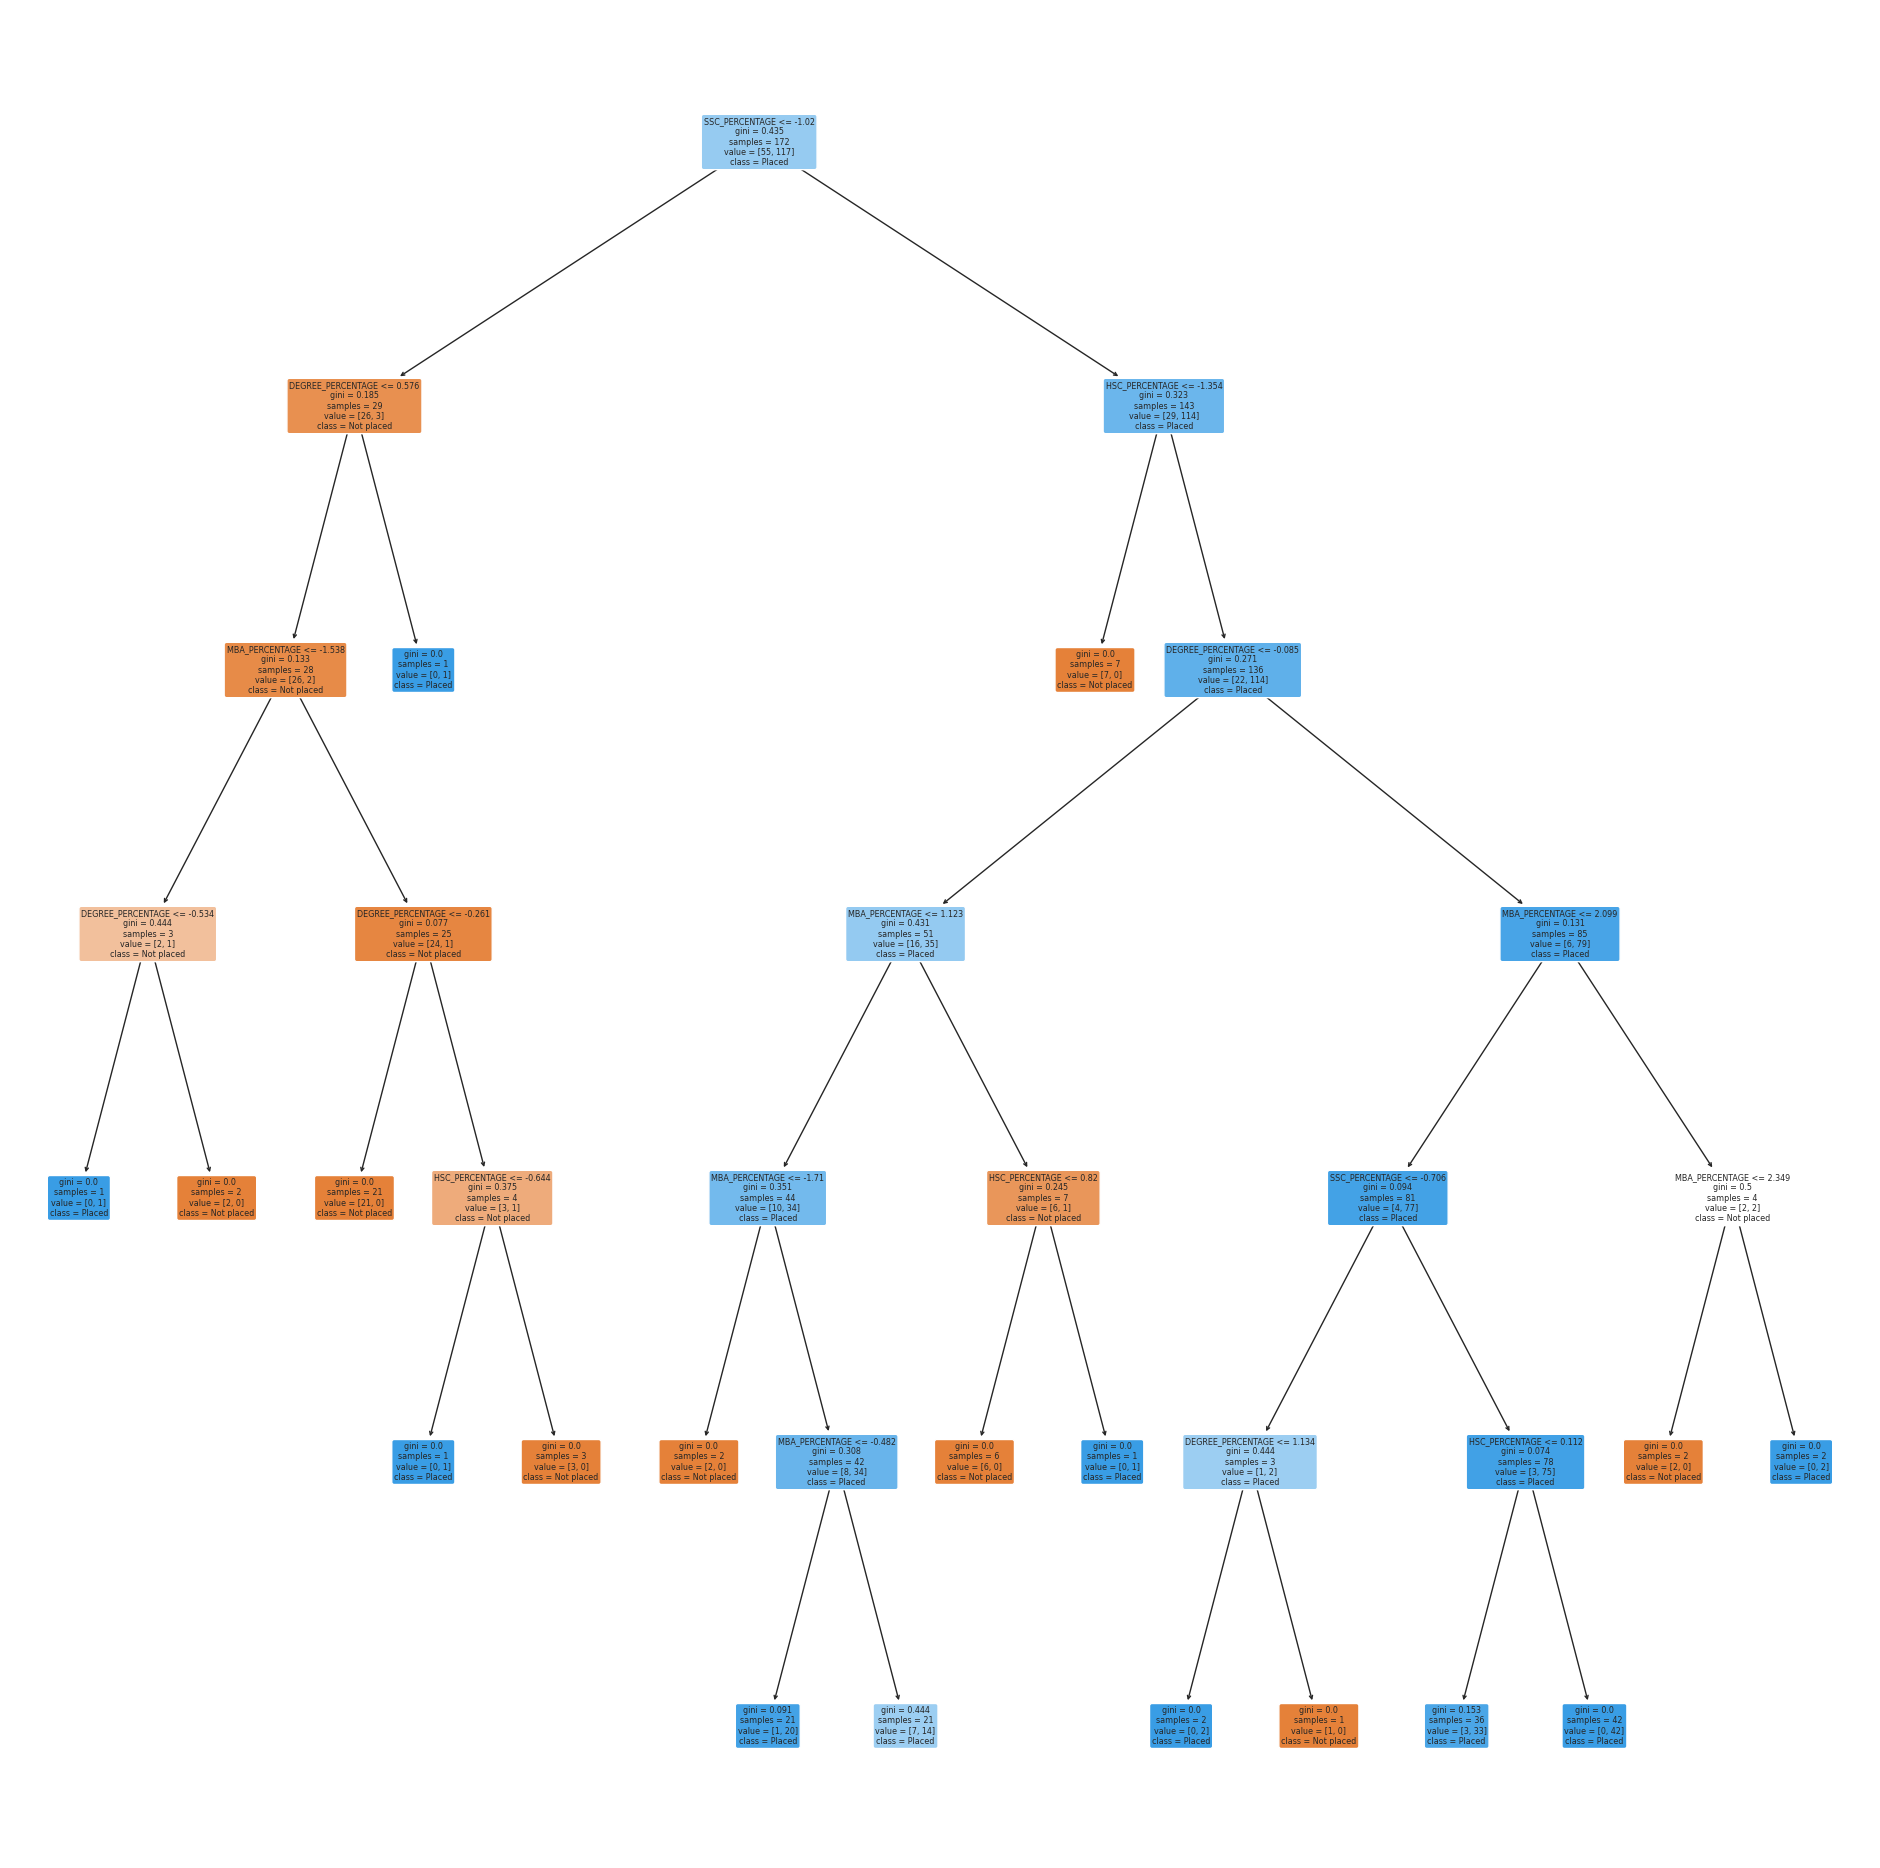

In [ ]:
# Train-test split of dataset with the best features selected 
X_new = df_clean_ohe[['SSC_PERCENTAGE', 'HSC_PERCENTAGE', 'DEGREE_PERCENTAGE','EMP_TEST_PERCENTAGE', 'MBA_PERCENTAGE']]
y= df_clean_ohe['Placed']
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.2)

# feature scaling using StandardScaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Decision Tree using Train Data
dectree.fit(X_train, y_train)                    

# plot tree with the best depth
from sklearn.tree import plot_tree
# Plot the trained Decision Tree
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_new.columns.tolist(), 
          class_names=["Not placed","Placed"])

In [ ]:
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

print("Accuracy on train dataset: ", dectree.score(X_train,y_train)*100, "%")
print("\nAccuracy on test dataset: ", dectree.score(X_test,y_test)*100, "%")

Accuracy on train dataset:  93.6046511627907 %

Accuracy on test dataset:  81.3953488372093 %


### **Evaluation of model**


In [ ]:
from sklearn.metrics import f1_score,recall_score,precision_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
prec_DT = precision_score(y_test, y_test_pred)
rec_DT = recall_score(y_test, y_test_pred)
f1_DT = f1_score(y_test,y_test_pred)

Classification report

In [ ]:
# Display the scores in classification report
target_names = ['Placed', 'Not Placed']
print(classification_report(y_test, y_test_pred, target_names=target_names))

              precision    recall  f1-score   support

      Placed       0.75      0.50      0.60        12
  Not Placed       0.83      0.94      0.88        31

    accuracy                           0.81        43
   macro avg       0.79      0.72      0.74        43
weighted avg       0.81      0.81      0.80        43



10-fold cross validation score

In [ ]:
# finding the cross validation score
accuracy_DT = cross_val_score(dectree, X=X_train, y=y_train, cv = 10)
# get the mean of each fold 
print("10-fold Cross Validation average accuracy of model is:",accuracy_DT.mean() * 100,"%")

10-fold Cross Validation average accuracy of model is: 76.76470588235293 %


**Confusion matrix**

Confusion Matrix for Train (left) and Test(right) Data


<Axes: >

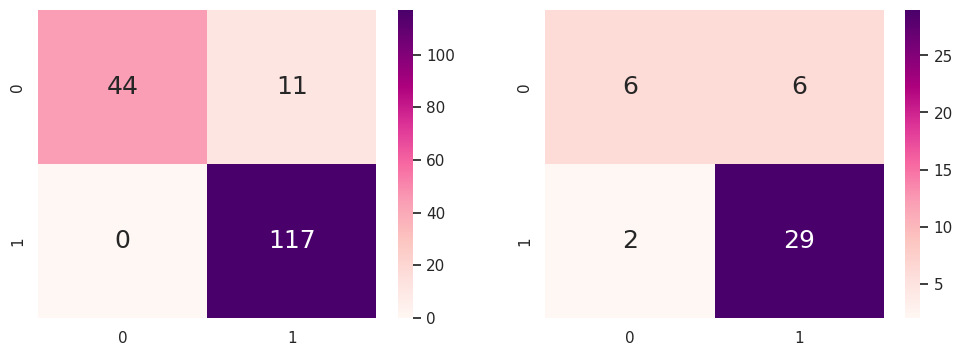

In [ ]:
# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
print('Confusion Matrix for Train (left) and Test(right) Data')

sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True,cmap="RdPu", fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, cmap="RdPu",fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

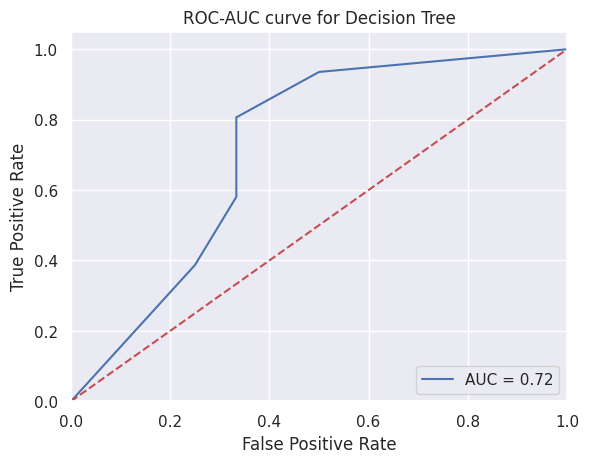

In [ ]:
#ROC-AUC CURVE

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
dt_roc_auc = roc_auc_score(y_test, dectree.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, dectree.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC = %0.2f' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC curve for Decision Tree')
plt.legend(loc="lower right")
plt.show()

# **`Logistic Regression`**

Logistic regression models the probability that an observation belongs to a particular category. To generate these probabilities, logistic regression uses the sigmoid function. 

If the curve goes to positive infinity, y predicted will become 1, and if the curve goes to negative infinity, y predicted will become 0. If the output of the sigmoid function is more than 0.5, we can classify the outcome as 1 or YES, and if it is less than 0.5, we can classify it as 0 or NO.

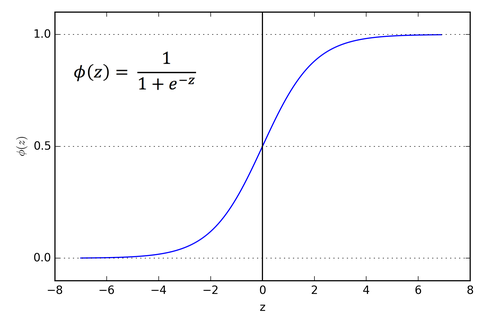

---
References on code implementation:
https://www.youtube.com/watch?v=VCJdg7YBbAQ

In [ ]:
# using the selected variables as predictors
X_new = df_clean_ohe[['SSC_PERCENTAGE', 'HSC_PERCENTAGE', 'DEGREE_PERCENTAGE',
       'MBA_PERCENTAGE', 'WORK_EXPERIENCE_No']]
y= df_clean_ohe['Placed']

X_train, X_test, y_train, y_test = train_test_split(X_new,y, test_size = 0.2)

# feature scaling using StandardScaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# fit model on train data
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, penalty='l1', random_state=0,
                   solver='liblinear')

In [ ]:
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

print("Accuracy on train dataset: ", logreg.score(X_train,y_train)*100, "%")
print("\nAccuracy on test dataset: ", logreg.score(X_test,y_test)*100, "%")

Accuracy on train dataset:  87.79069767441861 %

Accuracy on test dataset:  88.37209302325581 %


### **Evaluation of model**

In [ ]:
from sklearn.metrics import f1_score,recall_score,precision_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
prec_LR = precision_score(y_test, y_test_pred)
rec_LR = recall_score(y_test, y_test_pred)
f1_LR = f1_score(y_test,y_test_pred)

**Classification report**

In [ ]:
# Display the scores in classification report
target_names = ['Placed', 'Not Placed']
print(classification_report(y_test, y_test_pred, target_names=target_names))

              precision    recall  f1-score   support

      Placed       0.92      0.73      0.81        15
  Not Placed       0.87      0.96      0.92        28

    accuracy                           0.88        43
   macro avg       0.89      0.85      0.87        43
weighted avg       0.89      0.88      0.88        43



**10-fold Cross Validation Score**

In [ ]:
# finding the cross validation score
accuracy_LR = cross_val_score(logreg, X=X_train, y=y_train, cv = 10)
# get the mean of each fold 
print("10-fold Cross Validation average accuracy of model is:",accuracy_LR.mean() * 100,"%")

10-fold Cross Validation average accuracy of model is: 85.42483660130719 %


**Confusion Matrix**

Confusion Matrix for Train (left) and Test(right) Data


<Axes: >

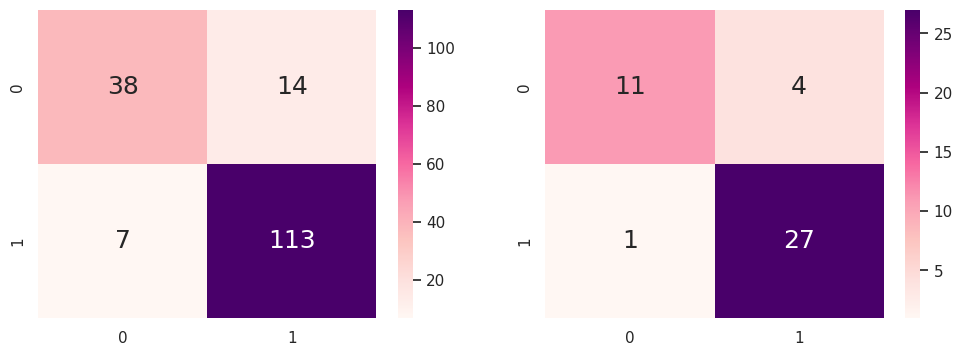

In [ ]:
# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
print('Confusion Matrix for Train (left) and Test(right) Data')

sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True,cmap="RdPu", fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, cmap="RdPu",fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

**ROC-AUC Curve**

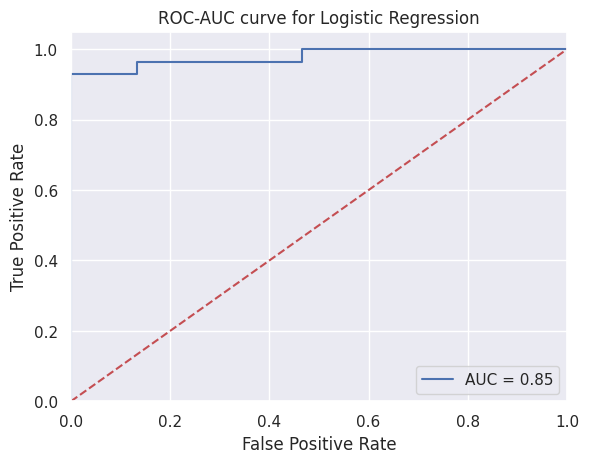

In [ ]:
#ROC-AUC CURVE

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC = %0.2f' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC curve for Logistic Regression')
plt.legend(loc="lower right")
plt.show()

# **`Support Vector Machine (SVM)`**
SVM is a type of deep learning algorithm that performs supervised learning for classification or regression of data groups. In machine learning, supervised learning systems provide both input and desired output data, which are labeled for classification. SVM works by mapping data to a high-dimensional feature space so that data points can be categorized, even when the data are not otherwise linearly separable.

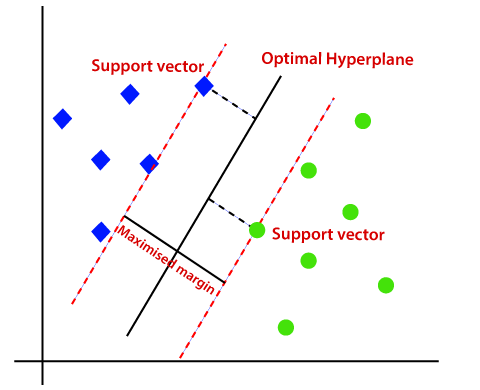

In [ ]:
# using the selected variables as predictors
X_new = df_clean_ohe[['SSC_PERCENTAGE', 'HSC_PERCENTAGE', 'DEGREE_PERCENTAGE',
       'MBA_PERCENTAGE', 'WORK_EXPERIENCE_No']]
y= df_clean_ohe['Placed']

X_train, X_test, y_train, y_test = train_test_split(X_new,y, test_size = 0.2)

# feature scaling using StandardScaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# fit model on train data
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
y_train_pred = svc.predict(X_train)
y_test_pred = svc.predict(X_test)

print("Accuracy on train dataset: ", svc.score(X_train,y_train)*100, "%")
print("\nAccuracy on test dataset: ", svc.score(X_test,y_test)*100, "%")

Accuracy on train dataset:  90.11627906976744 %

Accuracy on test dataset:  83.72093023255815 %


### **Evaluation of model**

In [ ]:
from sklearn.metrics import f1_score,recall_score,precision_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
prec_SVM = precision_score(y_test, y_test_pred)
rec_SVM = recall_score(y_test, y_test_pred)
f1_SVM = f1_score(y_test,y_test_pred)

**Classification report**

In [ ]:
# Display the scores in classification report
target_names = ['Placed', 'Not Placed']
print(classification_report(y_test, y_test_pred, target_names=target_names))

              precision    recall  f1-score   support

      Placed       0.91      0.62      0.74        16
  Not Placed       0.81      0.96      0.88        27

    accuracy                           0.84        43
   macro avg       0.86      0.79      0.81        43
weighted avg       0.85      0.84      0.83        43



**10-fold Cross Validation Score**

In [ ]:
# finding the cross validation score
accuracy_SVM = cross_val_score(svc, X=X_train, y=y_train, cv = 10)
# get the mean of each fold 
print("10-fold Cross Validation average accuracy of model is:",accuracy_SVM.mean() * 100,"%")

10-fold Cross Validation average accuracy of model is: 86.01307189542483 %


**Confusion Matrix**

Confusion Matrix for Train (left) and Test(right) Data


<Axes: >

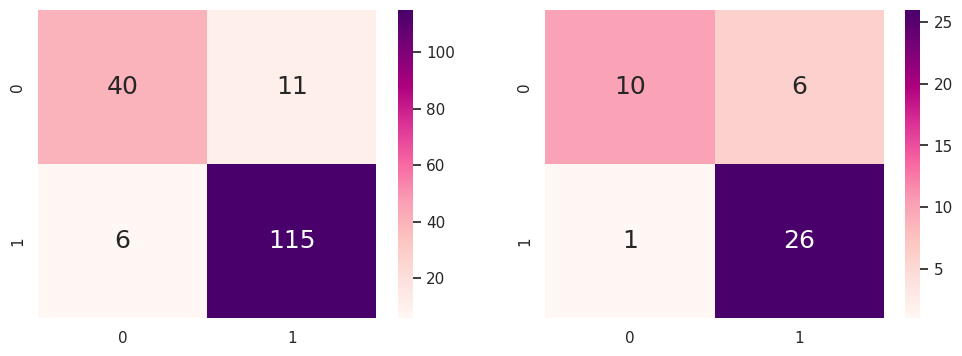

In [ ]:
# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
print('Confusion Matrix for Train (left) and Test(right) Data')

sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True,cmap="RdPu", fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, cmap="RdPu",fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

**ROC Curve**

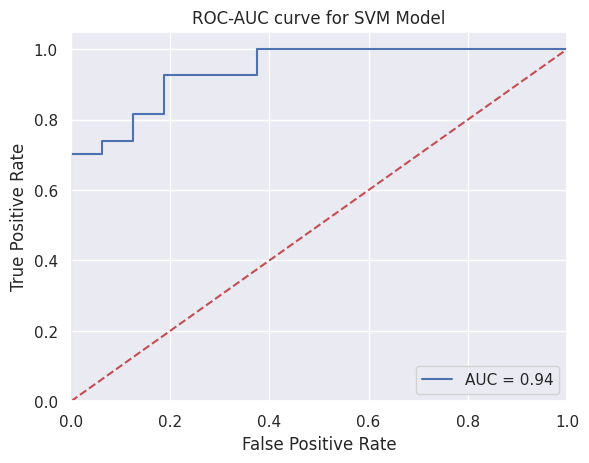

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)

y_pred_prob = svm_model.predict_proba(X_test)[:, 1]

svm_roc_auc = roc_auc_score(y_test, y_pred_prob)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.figure()
plt.plot(fpr, tpr, label='AUC = %0.2f' % svm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC curve for SVM Model')
plt.legend(loc="lower right")
plt.show()


# **Comparison of Models**


In [ ]:
# scores dataframe for decision tree
results1 = pd.DataFrame([['Decision Tree', accuracy_DT.mean(), prec_DT, rec_DT, f1_DT,dt_roc_auc]],columns=['Model', 'CV Accuracy', 'Precision', 'Recall','F1 Score', 'ROC-AUC score'])
results1

,Model,CV Accuracy,Precision,Recall,F1 Score,ROC-AUC score
0,Decision Tree,0.767647,0.828571,0.935484,0.878788,0.717742


In [ ]:
# scores dataframe for logistic regression
results2 = pd.DataFrame([['Log Regression',accuracy_LR.mean(),prec_LR,rec_LR,f1_LR,logit_roc_auc]],columns=['Model', 'CV Accuracy', 'Precision', 'Recall','F1 Score', 'ROC-AUC score'])
results2

,Model,CV Accuracy,Precision,Recall,F1 Score,ROC-AUC score
0,Log Regression,0.854248,0.870968,0.964286,0.915254,0.84881


In [ ]:
# scores dataframe for SVM
results3 = pd.DataFrame([['SVM (SVC)', accuracy_SVM.mean(), prec_SVM, rec_SVM, f1_SVM, svm_roc_auc]],columns=['Model', 'CV Accuracy', 'Precision', 'Recall','F1 Score', 'ROC-AUC score'])
results3

,Model,CV Accuracy,Precision,Recall,F1 Score,ROC-AUC score
0,SVM (SVC),0.860131,0.8125,0.962963,0.881356,0.939815


In [ ]:
results_merged = pd.concat([results1, results2,results3], ignore_index=True, sort=False)
results_merged

,Model,CV Accuracy,Precision,Recall,F1 Score,ROC-AUC score
0,Decision Tree,0.767647,0.828571,0.935484,0.878788,0.717742
1,Log Regression,0.854248,0.870968,0.964286,0.915254,0.848810
2,SVM (SVC),0.860131,0.812500,0.962963,0.881356,0.939815


`Logistic regression` performs best in most metrics except ROC-AUC score. Nevertheless, `F1 score` is the most crucial metric we shall look at. 

Having the highest `F1 score`, where it correctly identifies the positive cases (i.e., correctly predicting who gets placed in a job) while minimizing false positives (i.e., wrongly predicting that someone will get placed in a job). 